In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('/content/ma_lga_12345.csv')

In [4]:
# Step 1: Convert 'saledate' to datetime format
data['saledate'] = pd.to_datetime(data['saledate'], format='%d/%m/%Y')

# Step 2: Sort data by 'saledate'
data = data.sort_values(by='saledate')

In [5]:
# Step 3: Check for missing values and handle them
if data.isnull().sum().any():
    data = data.fillna(method='ffill').fillna(method='bfill')

In [11]:
# Step 4: Resample the data to monthly averages
numeric_data = data.select_dtypes(include=['number'])
monthly_data = numeric_data.resample('M').mean()

<ipython-input-11-698bebb6397a>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = numeric_data.resample('M').mean()


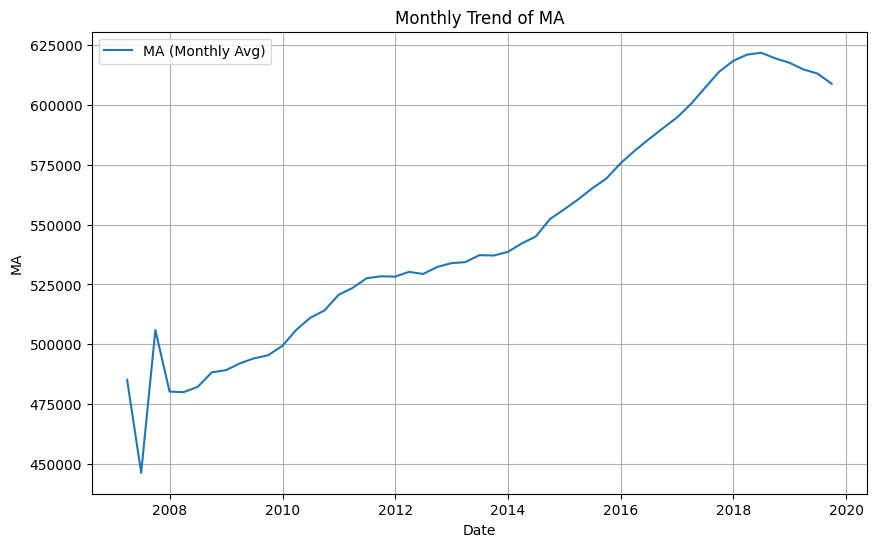

In [9]:
# Step 5: Visualize the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='MA', label='MA (Monthly Avg)')
plt.title('Monthly Trend of MA')
plt.xlabel('Date')
plt.ylabel('MA')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Summary of cleaned data
print("Cleaned Data Summary:")
print(monthly_data.head())

Cleaned Data Summary:
                  MA  bedrooms
saledate                      
2007-03-31  485130.0       3.5
2007-04-30       NaN       NaN
2007-05-31       NaN       NaN
2007-06-30  446359.0       3.0
2007-07-31       NaN       NaN
